# VGG-16 Model 1a
## Preprocessing method: ImageDataGenerator()
## Image size: (224, 224) 
## Images: RGB
## Frozen pretrained layers
## Image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
K.clear_session()

In [3]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [4]:
image_size = (224, 224)
batch_size = 128

datagen_transform = ImageDataGenerator(
    rescale =1./255,
    validation_split=.2,
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
)

train_ds = datagen_transform.flow_from_directory(
    path_training,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="rgb"
)

val_ds = datagen_transform.flow_from_directory(
    path_validation,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="rgb"
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [5]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = False

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
x = vgg_model(input_tensor)
out = keras.layers.Dense(2, activation='softmax')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=500     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________


In [6]:
vgg16_fit = model.fit(train_ds, 
                      epochs=epochs, 
                      validation_data=val_ds,
                      callbacks=[callback],
                      workers=12)

Epoch 1/500
368/368 [==============================] - 99s 245ms/step - loss: 0.6825 - accuracy: 0.5863 - val_loss: 0.6742 - val_accuracy: 0.6013
Epoch 2/500
368/368 [==============================] - 93s 240ms/step - loss: 0.6678 - accuracy: 0.6117 - val_loss: 0.6632 - val_accuracy: 0.6146
Epoch 3/500
368/368 [==============================] - 90s 238ms/step - loss: 0.6593 - accuracy: 0.6193 - val_loss: 0.6540 - val_accuracy: 0.6306
Epoch 4/500
368/368 [==============================] - 89s 237ms/step - loss: 0.6516 - accuracy: 0.6323 - val_loss: 0.6475 - val_accuracy: 0.6433
Epoch 5/500
368/368 [==============================] - 91s 241ms/step - loss: 0.6461 - accuracy: 0.6365 - val_loss: 0.6406 - val_accuracy: 0.6527
Epoch 6/500
368/368 [==============================] - 90s 237ms/step - loss: 0.6408 - accuracy: 0.6484 - val_loss: 0.6398 - val_accuracy: 0.6541
Epoch 7/500
368/368 [==============================] - 89s 237ms/step - loss: 0.6355 - accuracy: 0.6529 - val_loss: 0.6341 -

Epoch 57/500
368/368 [==============================] - 90s 238ms/step - loss: 0.5751 - accuracy: 0.7043 - val_loss: 0.5683 - val_accuracy: 0.7104
Epoch 58/500
368/368 [==============================] - 90s 239ms/step - loss: 0.5748 - accuracy: 0.7048 - val_loss: 0.5658 - val_accuracy: 0.7155
Epoch 59/500
368/368 [==============================] - 90s 239ms/step - loss: 0.5740 - accuracy: 0.7059 - val_loss: 0.5720 - val_accuracy: 0.7068
Epoch 60/500
368/368 [==============================] - 90s 239ms/step - loss: 0.5752 - accuracy: 0.7028 - val_loss: 0.5727 - val_accuracy: 0.7062
Epoch 61/500
368/368 [==============================] - 92s 243ms/step - loss: 0.5738 - accuracy: 0.7042 - val_loss: 0.5672 - val_accuracy: 0.7135
Epoch 62/500
368/368 [==============================] - 89s 237ms/step - loss: 0.5722 - accuracy: 0.7062 - val_loss: 0.5694 - val_accuracy: 0.7108
Epoch 63/500
368/368 [==============================] - 91s 239ms/step - loss: 0.5720 - accuracy: 0.7069 - val_loss: 0

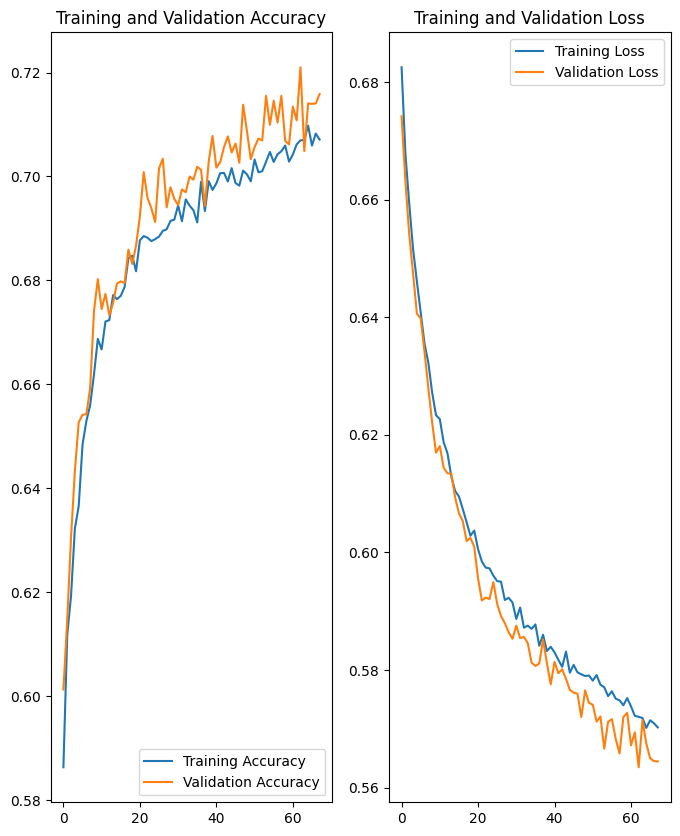

In [7]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 68)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.7098
Top Validation Accuracy: 0.721


In [9]:
model.save('GC weights/Frozen/mod1a-RGB/mod1a_RGB_frozen.h5')